## Урок 1. Алгоритм линейной регрессии. 
## Градиентный спуск

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

### Линейная регрессия

In [80]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]) # стаж
X.shape

(2, 10)

<img src='slope-intercept-form.png' width=250 align='left'></img>

$$\vec{y}=X\vec{w}+\vec{\epsilon},$$


$$\text{где }\vec{y} = \begin{pmatrix}
y_{1}\\ 
\vdots\\ 
y_{n}
\end{pmatrix}, 
X = \begin{pmatrix}
1 & x_{1}\\ 
\vdots & \vdots\\ 
1 & x_{n}
\end{pmatrix},
\vec{w} = \begin{pmatrix}
w_{0}\\ 
w_{1}
\end{pmatrix}
$$

In [81]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

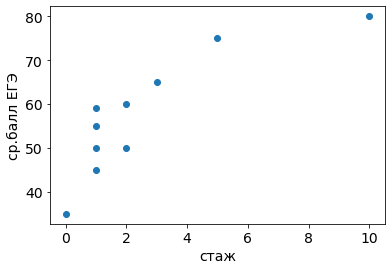

In [7]:
plt.scatter(X[1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

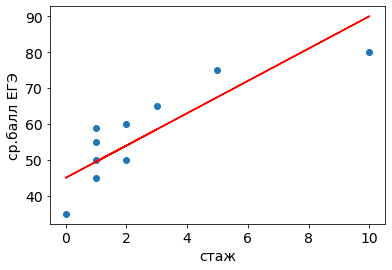

In [8]:
# y = m * x + b
m = 4.5
b = 45
plt.scatter(X[1], y);
plt.plot(X[1],  m * X[1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [78]:
y_pred1 = 45 + 4.5 * X[1] 
y_pred2 = 40 + 7 * X[1]

In [79]:
y_pred1

array([49.5, 49.5, 54. , 49.5, 58.5, 45. , 67.5, 90. , 49.5, 54. ])

In [11]:
y_pred2

array([ 47,  47,  54,  47,  61,  40,  75, 110,  47,  54])

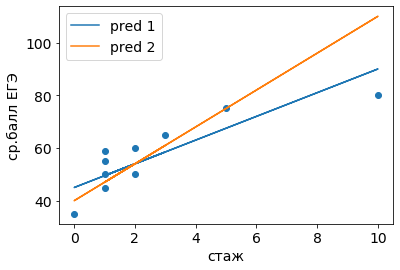

In [12]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='pred 1')
plt.plot(X[1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [13]:
w = [35, 5]
print(w @ X)
print(np.dot(w, X))
print(np.dot(X.T, w))
print(w[0] * X[0] + w[1] * X[1])
print(np.sum(w * X.T, axis=1))

[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]
[40 40 45 40 50 35 60 85 40 45]


In [14]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(0.7, -0.8)

In [15]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(6.4, 7.4)

In [16]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(49.15, 121.4)

### Метод наименьших квадратов

Нормальное уравнение линейной регрессии
$$\vec{w} = (X^{T}X)^{-1}X^{T}\vec{y}$$

In [17]:
w = np.linalg.inv(X @ X.T) @ X @ y
w

array([47.23214286,  3.91071429])

In [18]:
w1 = np.sum((y - np.mean(y)) * (X[1] - X[1].mean())) / np.sum((X[1] - X[1].mean()) ** 2)
w0 = np.mean(y) - w1 * X[1].mean()
w0, w1

(47.23214285714286, 3.910714285714285)

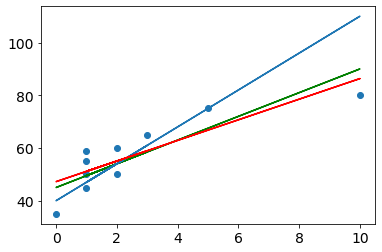

In [29]:
plt.scatter(X[1], y)
plt.plot(X[1], 45 + X[1] * 4.5, color='g')
plt.plot(X[1], 40 + X[1] * 7)
plt.plot(X[1], w[0] + w[1] * X[1], color='red');

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [21]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(6.4, 49.15)

In [22]:
y_pred3 = w[0] + w[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [23]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142858, 45.93749999999999)

### Градиентный спуск

<img src='grad_desent.gif' width=500 align='center'></img>

$$L(w)=\frac{1}{n}\sum^{n}_{i=1}\big({y_{pred}}_i-y_{i}\big)^{2}=\frac{1}{n}\sum^{n}_{i=1}\big((w_0\cdot x_{i0}+w_1\cdot x_{i1})-y_{i}\big)^{2}\rightarrow \underset{w}{\text{min}}$$
$$w_j\leftarrow w_j-\alpha\frac{\partial}{\partial w_j}L(w)$$
$$\frac{\partial L(w)}{\partial w_j}=\frac{1}{n} 2\sum^{n}_{i=1}x_{ij}\Big(\sum^{m}_{j=0}(w_jx_{ij})-y_i\Big)$$
$$\vec{w}=\vec{w}-\alpha \frac{2}{n}X^T(X\vec{w}-\vec{y}) $$


In [24]:
n = 10
alpha = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X * (np.sum(w * X.T, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X, (np.dot(w, X) - y))
w, w - alpha * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

### Домашние задания

1. Подберите скорость обучения (alpha) и количество итераций:

In [40]:
n = X.shape[1]
alpha = 1e-2
w = np.array([1, 0.5])

for i in range(700):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))
    if i % 20 == 0:
        print(i, w, err)

0 [2.102 3.9  ] 3173.15
20 [11.82321845 10.44288316] 734.1943046789495
40 [18.50371626  9.21563317] 499.01844357436784
60 [23.92307798  8.21491142] 344.20218946868323
80 [28.32012482  7.40296309] 242.28613537222662
100 [31.88770806  6.74418155] 175.19445858001848
120 [34.78229859  6.20967327] 131.0277849906938
140 [37.13085048  5.7759952 ] 101.95271712515984
160 [39.03636904  5.42412662] 82.8125034145725
180 [40.58242855  5.1386349 ] 70.21243717977558
200 [41.83683774  4.90699865] 61.9177717428135
220 [42.85461385  4.7190585 ] 56.457365945808625
240 [43.68039559  4.56657159] 52.862762680063796
260 [44.35040098  4.44284997] 50.4964234154635
280 [44.89401584  4.34246733] 48.938654420884696
300 [45.33508261  4.26102097] 47.913169919666764
320 [45.69294608  4.19493875] 47.23809006771321
340 [45.9833018   4.14132234] 46.793682759779806
360 [46.21888451  4.09782019] 46.50112795345122
380 [46.41002664  4.06252433] 46.30853815310798
400 [46.56511152  4.03388672] 46.18175564810758
420 [46.69094

Для пробы количество итераций сделал заведомо излишним (10000), чтобы определить начиная с какой о счету итерации изменение весов и ошибки будет незначительным:
- незначительным изменением буду считать изменения 2-й после запятой цифры
- с alpha = 1e-3 после 7000 итераций значительных изменений нет, но итераций всё же многовато поэтому альфа будет увеличина на порядок (alpha = 1e-2), а число итераций на этот же порядок уменьшено.
- Получаем:
alpha = 1e-2
for i in range(700):


*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [96]:
w = np.array([1, 0.5])

for i in range(1000):
    y_pred = np.dot(w, X)
    err = calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 100 == 0:
        print(i, w, err)

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога